> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
What are the factors affecting patient attendance or non-attendance?



In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [49]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
#knowing the shape of dataset
df.shape

(110527, 14)

In [48]:
#showing information about my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [25]:
#Showing insights and descriptive statistics about my dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [50]:
df['Age'].mean()

37.088874211731067

In [51]:
#Showing The row index of the value of -1 "invalid value" for the age
age_invalid = df.query('Age < 0')
age_invalid #konw the row/s number/s

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


this is an invaild age value(-1) at index = 99832 which is < 0 

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#Checking the Duplicated rows

df.duplicated().sum()

0

In [7]:
#Checking the Uniqueness 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#Checking the Duplicated Patients rows 
df['PatientId'].duplicated().sum()

48228

In [9]:
#Checking the number of duplicated patients and Noshow 

df.duplicated(['PatientId', 'No-show']).sum()

38710

<a id='eda'></a>
### Data Cleaning

> **Tip**: Cleaning the dataset 
drop null vlaues and drop duplicates
 

In [10]:
#Clear the dataset from the invalid age row which index = 99832

df.drop(age_invalid.index, inplace=True)

df.describe()

NameError: name 'age_invalid' is not defined

In [11]:
#Modification of the names of columms
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Cleaning the dataset (remove the duplicates)

df.drop_duplicates(['patientid', 'no_show'], inplace = True)
df.shape

(71817, 14)

In [13]:
#Cleaning the dataset(Remove the unneeded data for analysis)
df.drop(['patientid', 'appointmentid','scheduledday', 'appointmentday'],axis=1,inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section.


### Overview

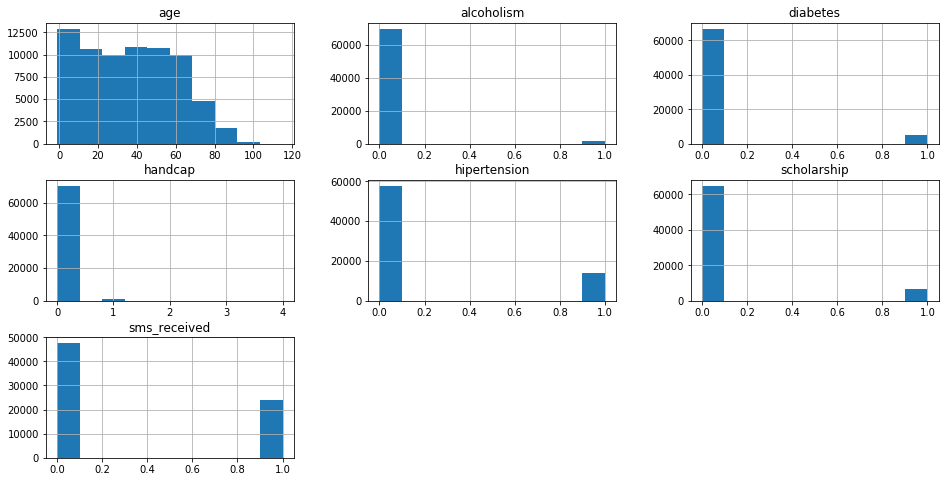

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16, 8));

Histograms dataset

In [15]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000
mean,36.526978,0.095534,0.195065,0.070958,0.025036,0.020135,0.335561
std,23.378518,0.293954,0.396254,0.256757,0.156235,0.155337,0.472190
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


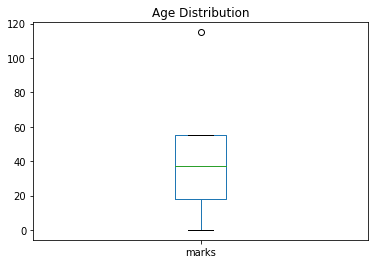

In [17]:
#Age Distribution #min = 0 #0.25 = 18 #0.50 = 37 #75 = 55 and #max = 115
data = pd.DataFrame({'marks': [0, 18, 37, 55, 115]})
data['marks'].plot(kind='box', title='Age Distribution')
plt.show();

The age ranges from 0 to 115 and the average age is 36

In [18]:
#Split the data into two main groups (show and np_show)
show = df.query('no_show == "No"').count()['no_show']
no_show = df.query('no_show == "Yes"').count()['no_show']
show, no_show

(54154, 17663)

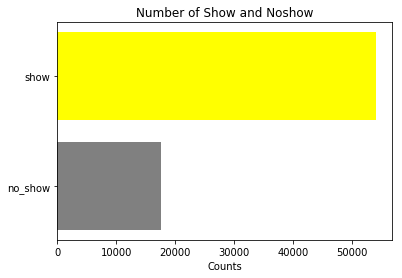

In [21]:
#Show the number of show and noshow
plt.barh(["show", "no_show"], [show, no_show], color=['yellow', 'grey'])
plt.xlabel("Counts")
plt.title("Number of Show and Noshow");

The Number of show(54154) is much more than the Number of noshow(17663)

In [62]:
df[show].mean(), df[no_show].mean()

(age             37.229166
 scholarship      0.091334
 hypertension     0.202944
 diabetes         0.072868
 alcoholism       0.023600
 handcap          0.020904
 sms_received     0.297232
 dtype: float64, age             34.376267
 scholarship      0.108419
 hypertension     0.170922
 diabetes         0.065108
 alcoholism       0.029440
 handcap          0.017777
 sms_received     0.453094
 dtype: float64)

### Investigation 

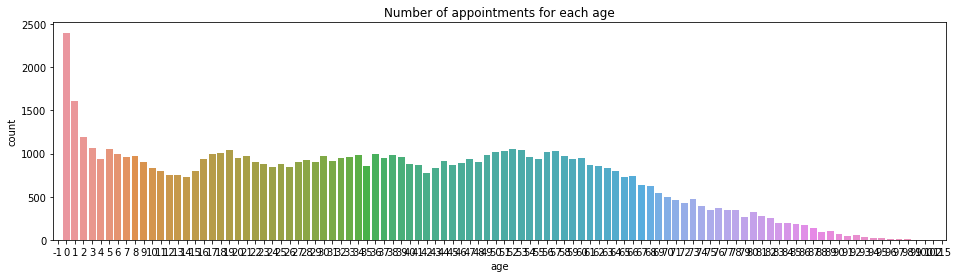

In [22]:
#Patients For each Age
plt.figure(figsize=(16, 4))
age = sns.countplot(x=df.age)
age.set_title("Number of appointments for each age")
plt.show()

The most attended ages are between 0 to 8 and also between 45 to 55 have a high attendance rate, and so on, the higher the age, the lower the attendance rate


In [23]:
received = df['sms_received'].value_counts()[1]

not_received = df['sms_received'].value_counts()[0]

received, not_received


(24099, 47718)

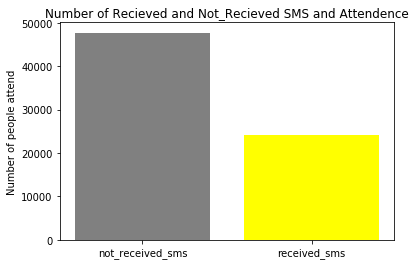

In [25]:
# Is sms a factor in attendance or not?
plt.bar(["received_sms", "not_received_sms"], [received, not_received], color=["yellow", "grey"])
plt.ylabel("Number of patients attend")
plt.title("Number of Recieved and Not_Recieved SMS and Attendence");

The number of patients attend and recieve sms is less than the number of patients attend and not recieve sms and it is indicate the SMS campaigns need more improvements

In [98]:
#is the Gender affect attendence the appointment
gender = df['gender'].value_counts()
gender

F    46466
M    25350
Name: gender, dtype: int64

In [100]:
male = df['gender'].value_counts()['M']
female = df['gender'].value_counts()['F']
male, female

(25350, 46466)

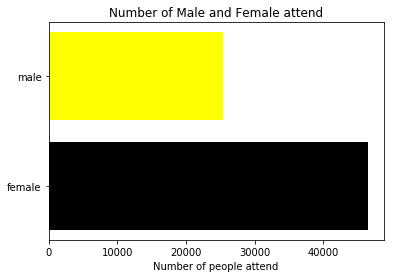

In [102]:
#is the Gender affect attendence the appointment

plt.barh(["male", "female"], [male, female], color=["yellow", "black"])
plt.xlabel("Number of people attend")
plt.title("Number of Male and Female attend");

The number of females attend is much more than the number of males attend

In [110]:
df['neighbourhood'].nunique()

81

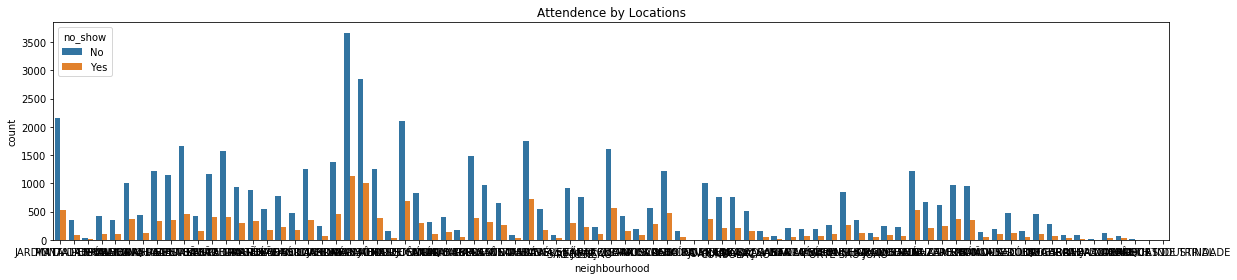

In [27]:
#Does the location affect the patient’s attendance or not?
plt.figure(figsize=[20,4])
sns.countplot(df.neighbourhood, hue=df.no_show) 
plt.title("Attendence by Locations")
plt.show();

The most patients attend the appointment are in "JARDIM CAMBURI" neighourhood

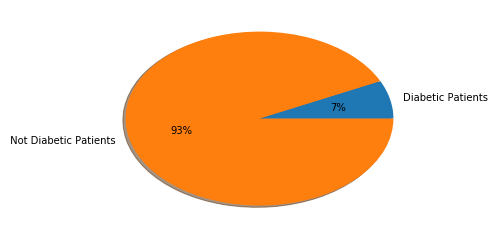

In [136]:
#the relationship between diabates and attendence
df['diabetes'].value_counts()
Diabetic_patient = df['diabetes'].value_counts()[1]
Not_Diabetic_patient = df['diabetes'].value_counts()[0]
Diabetic_patient, Not_Diabetic_patient

y = np.array([Diabetic_patient, Not_Diabetic_patient])
label = ["Diabetic Patients", " Not Diabetic Patients"]
plt.pie(y, labels= label, shadow = True, autopct="%.0f%%")
plt.show();

The normal patient attend appointment more than diabetes patient

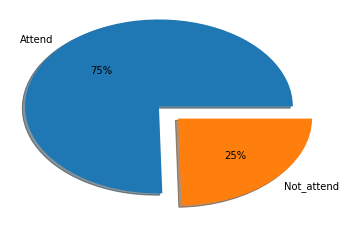

In [131]:
#Percentage of patient attend

per = np.array([show, no_show])
mylabels = ["Attend", "Not_attend"]
myexplode = [0.2, 0]
plt.pie(per, labels = mylabels, explode=myexplode, shadow=True, autopct="%.0f%%")
plt.show();

The percentage of attendence is more than the percentage of non_attendence

<a id='conclusions'></a>
## Conclusions

> **Tip**: it is a clear relationship between age and attendence (that's clear patients who between 0 and 8 years are more likely to attend than others)
it is a clear that is no relation between communcation via SMS and attend the appointment 
it is a clear relationship between the gender of patient and attend the appointment (female attend much more than male)
that is clear the most neighbourhood's patients attend is "JARDIM CAMBURI" 
it is a clear relationship between diabetes and attendence (normal people attend the appointment more than the diabetes patients)

## limitations
> the data need more detalis and information to do more analysis of it and improve the analysis process
>The address of patient this help to determine if the distance from patient to medical centre make difference


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0